# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [4]:
# Create data
data_rndm = np.random.randn(100)
# Save to file
f_name = 'simple_data.txt'
np.savetxt(f_name, data_rndm)

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [7]:
# Create data
data_rndm = np.random.randn(5, 5)
# Save to file 
f_name = 'data.txt'
np.savetxt(f_name, data_rndm)

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [12]:
# Load the file
data_file = open('data.txt', 'r')
# Open empty csv file
data_file_csv = open('data.csv', 'w')
# Transform the data into csv format
for line in data_file.readlines():
    data_file_csv.write(line.replace(' ',','))
# Close both files 
data_file.close()
data_file_csv.close()

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [68]:
# Load data
credit_card_data = open('credit_card.dat')
# Store credit card numbers in a list
credit_card_nums = []
for line in credit_card_data.readlines():
    line = line.replace('\n', '')
    nums = np.array(list(line[:-4]))
    nums = np.reshape(nums, (len(nums)//6, 6))
    
    char_line = ''
    for i in range(nums.shape[0]):
        char_line += chr(int(''.join(list(nums[i,:])), base=2))
        
    # If there is no number just skip ahead
    if char_line == '':
        continue
        
    # Otherwise we save the number
    credit_card_nums.append(char_line)
    
# Print credit card numbers
print(credit_card_nums)
# Close file
credit_card_data.close()

['7648 5673 3775 2271', '3257 8247 3354 2266', '2722 0001 4011 6652', '0661 3063 3742 3150', '0432 1608 1462 4742', '5827 2027 8785 7303', '5774 8528 2087 1117', '8140 1210 6352 2845', '5764 1133 7301 7100', '6456 1737 4126 6726', '1228 8631 7382 0000', '7051 0160 5374 3166', '0618 3587 1630 6376', '1545 5454 7444 5636', '6735 3116 3202 6834', '7287 5011 1547 8413', '7033 2607 3328 4200', '2568 5244 1874 5024', '1684 2253 7570 7118', '0672 2576 0575 6631', '6332 8353 8787 1340', '1813 3361 1175 4211', '2477 6450 8840 2368', '5512 3505 2563 1326', '3083 7882 0621 0025', '4521 5148 8045 0334', '7563 3654 8713 5787', '8324 2664 0476 5561', '0565 2504 7168 3510', '5107 5507 1767 0738', '2462 1821 2448 1443', '2788 0638 6861 6554', '5851 5873 5474 0547', '0670 1004 4013 2655', '5874 5506 3048 0806', '2805 5401 8462 1260', '5083 8406 6310 1862', '1076 1445 3013 2266', '8440 4804 4844 5277', '4758 6141 0686 1387', '7586 0675 0315 2568', '2544 1258 7432 5165', '3474 5023 4434 5626', '1410 0270

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [71]:
# Import python's json module
import json

In [96]:
# Load data
user_file = open('user_data.json', 'r')
user_data = json.load(user_file)
AM_Express_users = []
for user in user_data:
    if user['CreditCardType'] == 'American Express':
        AM_Express_users.append(user)
        
# Now we save the AM Express users to a csv
am_express_file = open('AM_Express_users.csv', 'w')

# Define and write header to file
header = ','.join(list(AM_Express_users[0].keys()))
file_str = header + '\n'

# Iterate over the users and save data to the file str
for i, user in enumerate(AM_Express_users):
    file_str += ','.join(list(user.values())) 
    if i != len(AM_Express_users) - 1:
        file_str += '\n'

# Write filtered users to file
am_express_file.write(file_str)

# Close files
user_file.close()
am_express_file.close()

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


In [112]:
# Import pandas and get data
import pandas as pd
url = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
df = pd.read_csv(url)

In [113]:
print('Features present in the data:')
print(', '.join(list(df.columns)))

Features present in the data:
class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat


In [114]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


It appears as if the feature "veil-type" has no information. Let's check if this is the case.

In [115]:
df['veil-type'].unique()

array([0])

Indeed, the "veil-type" column contains no useful information. Therefore we're going to drop it.

In [116]:
df = df.drop(columns=['veil-type'])

Let's see if this is also the case for other columns.

In [118]:
print('Number of unique values per feature:')
for col in list(df.columns):
    print('%s: %d' % (col, len(df[col].unique())))

Number of unique values per feature:
class: 2
cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


All of the remaining features have some variability. Let's do a histogram of the "class" feature distribution.

<AxesSubplot:>

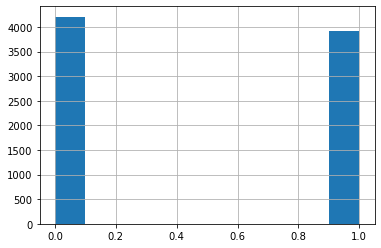

In [119]:
df['class'].hist()

The feature "class" seems to be a binary variable.

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [120]:
# Get data
url = 'https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
df = pd.read_csv(url)

In [123]:
# Import pyplot 
import matplotlib.pyplot as plt

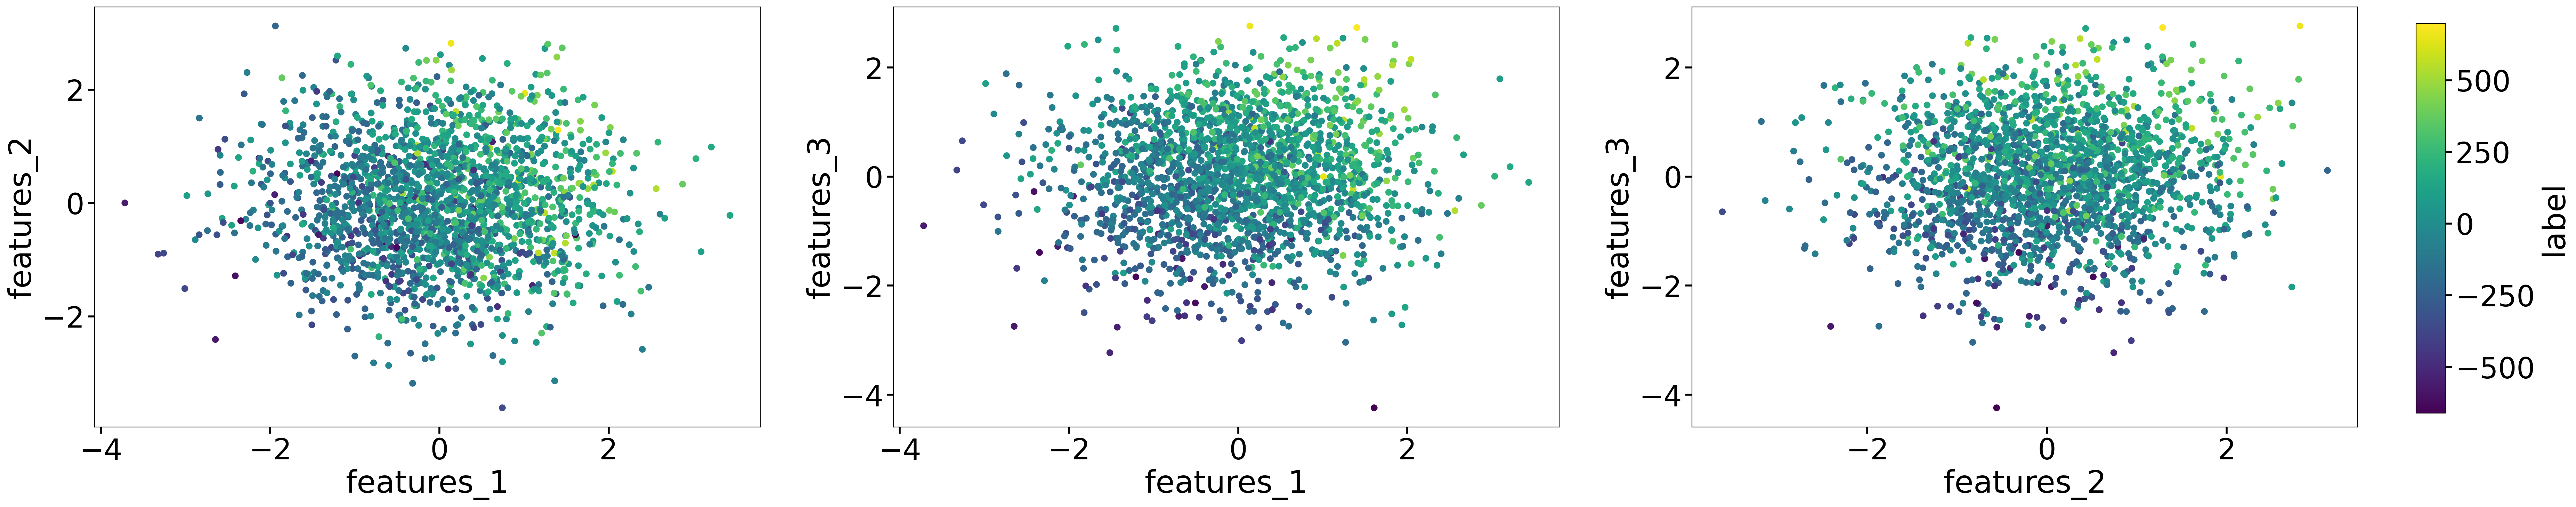

In [167]:
# Now let's plot all possible combinations 
# of the first three features
feat_combos = [['features_1', 'features_2'],
               ['features_1', 'features_3'],
               ['features_2', 'features_3']]
# Initialize figure
fig, axs = plt.subplots(nrows=1, ncols=3, 
                        figsize=(3*13 + 3, 8), dpi=200)
FONTSIZE = 30
# Plot data
for i, comb in enumerate(feat_combos):
    plot = axs[i].scatter(df[comb[0]], df[comb[1]], 
                   c=df['label'])
    axs[i].tick_params(length=7, width=2, labelsize=FONTSIZE)
    axs[i].set_xlabel(comb[0], fontsize=FONTSIZE + 2)
    axs[i].set_ylabel(comb[1], fontsize=FONTSIZE + 2)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(plot, cax=cbar_ax)
cbar.ax.tick_params(length=7, width=2, labelsize=FONTSIZE)
cbar.set_label('label', fontsize=FONTSIZE+2)

8\. Load the same file of point 6, and convert the file to json with Pandas.